In [1]:
# 📓 Customer Retention Analysis: 01_eda_descriptive.ipynb

## 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")


In [2]:

## 2. Simulate Customer Data
np.random.seed(42)
n = 300
data = pd.DataFrame({
    "CustomerID": np.arange(1, n+1),
    "TotalOrders": np.random.poisson(lam=2.5, size=n),
    "AvgOrderValue": np.random.normal(loc=600, scale=100, size=n).round(2),
    "DaysSinceLastPurchase": np.random.randint(10, 180, size=n)
})

# Flag churned customers (no purchase in 90+ days & <3 orders)
data["IsChurned"] = ((data["DaysSinceLastPurchase"] > 90) & (data["TotalOrders"] < 3)).astype(int)

## 3. View Sample Data
data.head()

## 4. Summary Statistics
data.describe()


,CustomerID,TotalOrders,AvgOrderValue,DaysSinceLastPurchase,IsChurned
count,300.000000,300.000000,300.000000,300.000000,300.00000
mean,150.500000,2.450000,599.214467,95.970000,0.29000
std,86.746758,1.560647,95.415512,49.364006,0.45452
min,1.000000,0.000000,251.920000,10.000000,0.00000
25%,75.750000,1.000000,533.480000,54.750000,0.00000
50%,150.500000,2.000000,600.635000,96.500000,0.00000
75%,225.250000,3.000000,662.580000,138.250000,1.00000
max,300.000000,8.000000,896.500000,179.000000,1.00000


In [3]:

## 5. Churn Rate
churn_rate = data["IsChurned"].mean()
print(f"Churn Rate: {churn_rate:.2%}")


Churn Rate: 29.00%


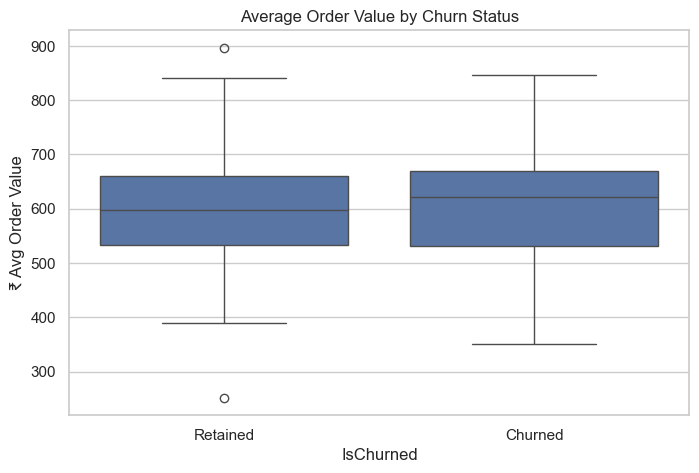

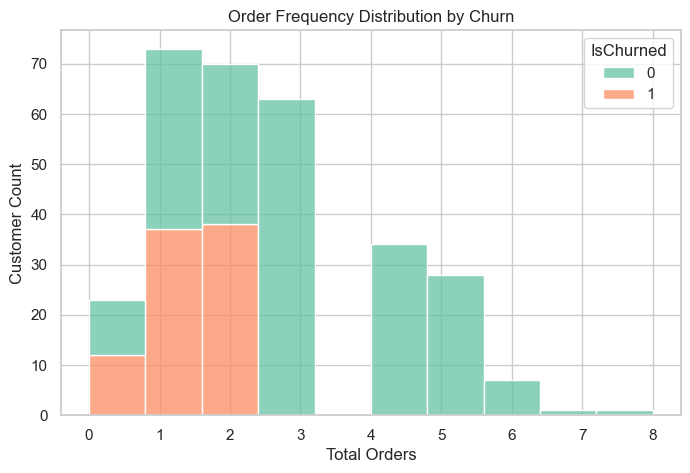

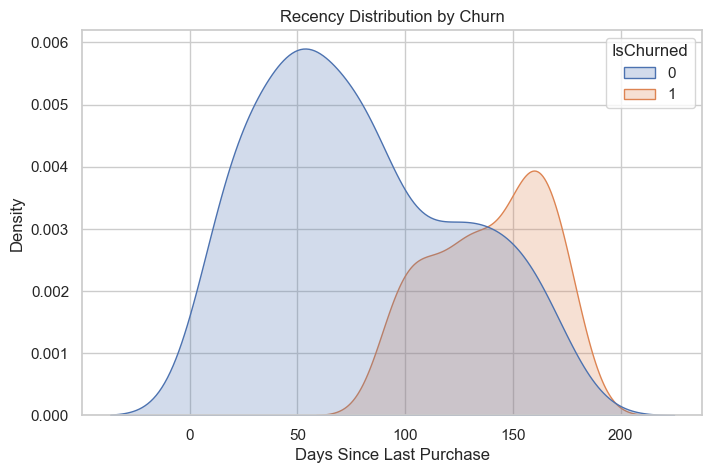

In [4]:

## 6. AvgOrderValue by Churn Status (Boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(x="IsChurned", y="AvgOrderValue", data=data)
plt.xticks([0, 1], ["Retained", "Churned"])
plt.title("Average Order Value by Churn Status")
plt.ylabel("₹ Avg Order Value")
plt.show()

## 7. Total Orders by Churn Status
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="TotalOrders", hue="IsChurned", multiple="stack", bins=10, palette="Set2")
plt.title("Order Frequency Distribution by Churn")
plt.xlabel("Total Orders")
plt.ylabel("Customer Count")
plt.show()

## 8. Days Since Last Purchase
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x="DaysSinceLastPurchase", hue="IsChurned", fill=True)
plt.title("Recency Distribution by Churn")
plt.xlabel("Days Since Last Purchase")
plt.show()


In [8]:

## 9. Save Processed Data (Optional)
data.to_csv("../data/processed//customer_data.csv", index=False)
